# Задание 6

Также было бы интересно посмотреть, какие товары пользуются наибольшим спросом и приносят нам основной доход.

Задание:

Для каждого товара, представленного в таблице products, за весь период времени в таблице orders рассчитайте следующие показатели:

1. Суммарную выручку, полученную от продажи этого товара за весь период.
2. Долю выручки от продажи этого товара в общей выручке, полученной за весь период.
Колонки с показателями назовите соответственно revenue и share_in_revenue. Колонку с наименованиями товаров назовите product_name.

Долю выручки с каждого товара необходимо выразить в процентах. При её расчёте округляйте значения до двух знаков после запятой.

Товары, округлённая доля которых в выручке составляет менее 0.5%, объедините в общую группу с названием «ДРУГОЕ» (без кавычек), просуммировав округлённые доли этих товаров.

Результат должен быть отсортирован по убыванию выручки от продажи товара.

Поля в результирующей таблице: product_name, revenue, share_in_revenue

```sql
with revenue_table AS (
  SELECT
    name AS product_name,
    sum(price) AS revenue
  FROM
    (
      SELECT
        unnest_query.date,
        unnest_query.product_id,
        products.name,
        products.price AS price
      FROM
        (
          SELECT
            order_id,
            creation_time :: date AS date,
            unnest(product_ids) AS product_id
          FROM
            orders
        ) AS unnest_query
        JOIN products using (product_id)
      WHERE
        unnest_query.order_id NOT in (
          SELECT
            order_id
          FROM
            user_actions
          WHERE
            action = 'cancel_order'
        )
    ) AS subq
  GROUP BY
    1
),
grouped_products AS(
  SELECT
    *,
    round(
      revenue / (
        SELECT
          sum(revenue)
        FROM
          revenue_table
      ) :: decimal * 100,
      2
    ) AS share_in_revenue
  FROM
    revenue_table
  ORDER BY
    2 desc
)
SELECT
  *
FROM
  grouped_products
WHERE
  share_in_revenue >= 0.5
UNION
SELECT
  'ДРУГОЕ',
  sum(revenue),
  sum(share_in_revenue)
FROM
  grouped_products
WHERE
  share_in_revenue < 0.5
ORDER BY
  2 DESC
```

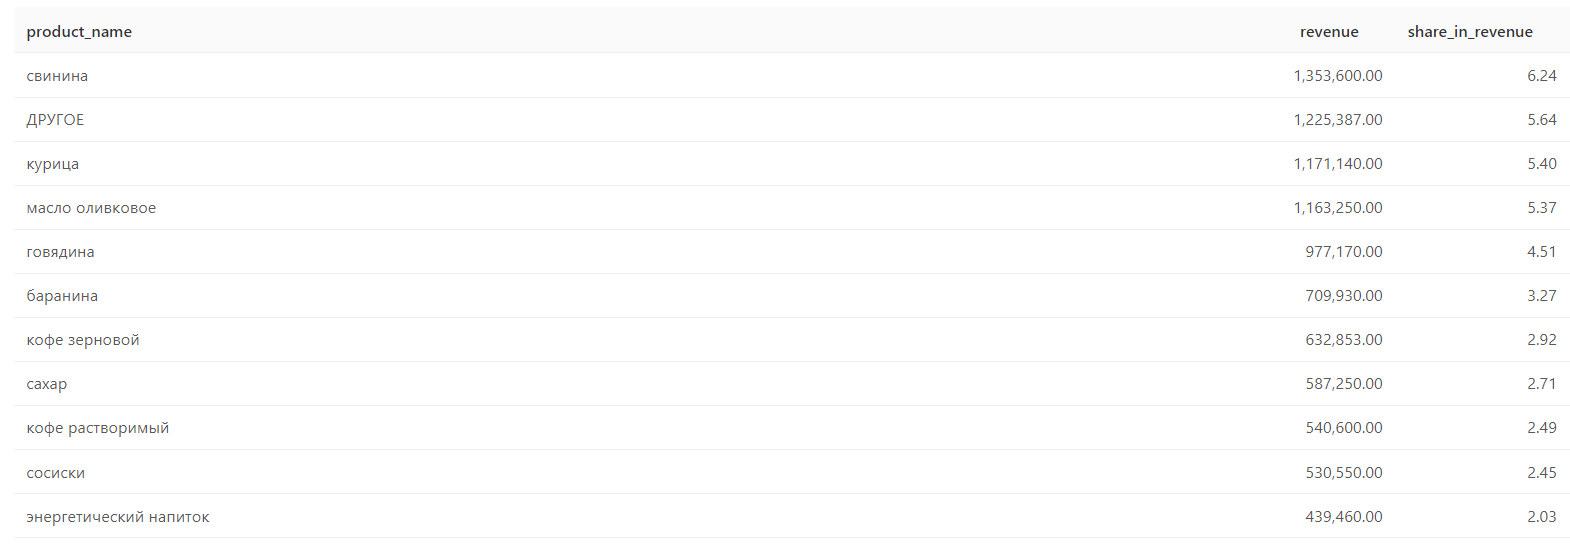

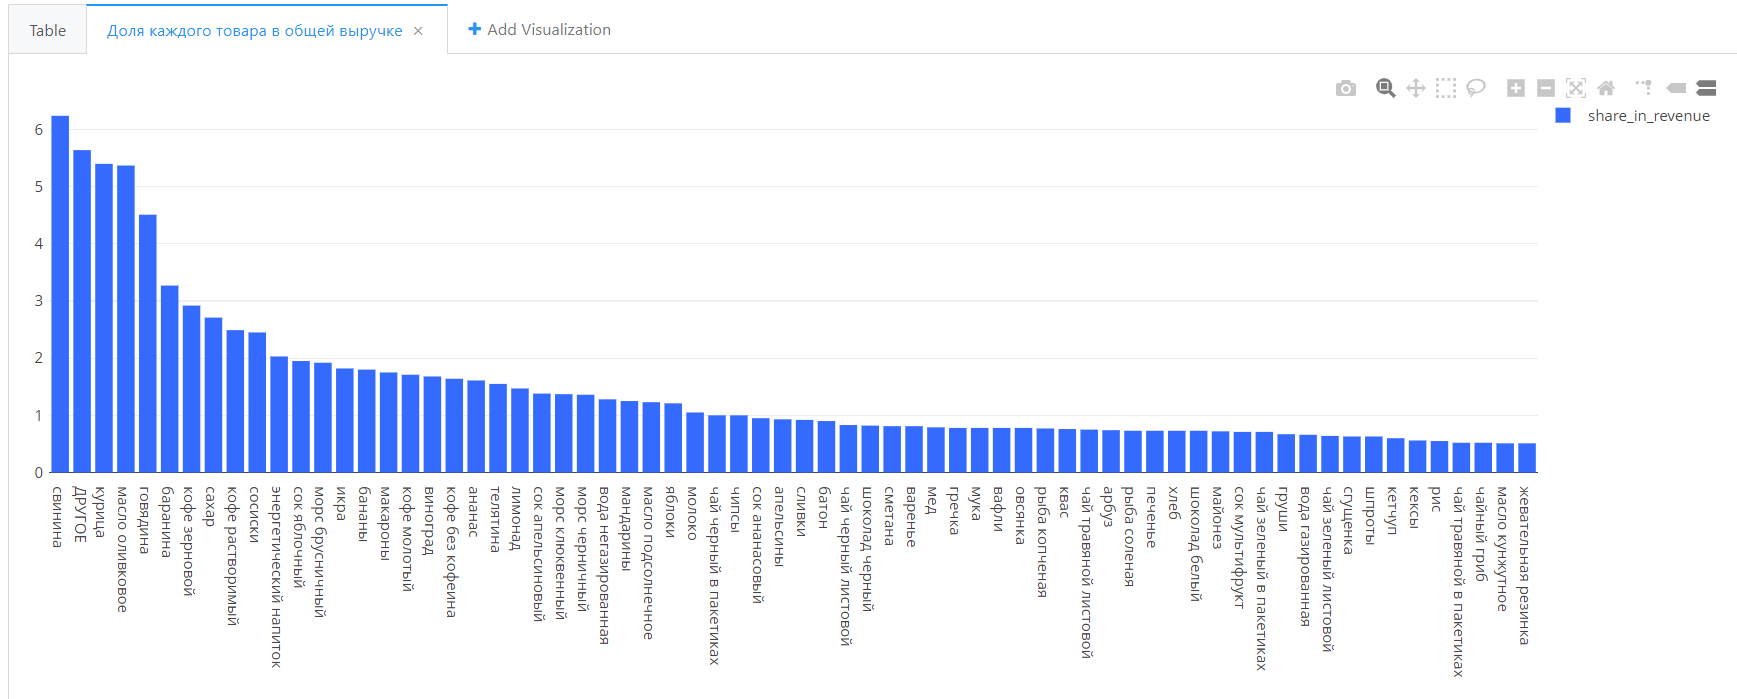